In [21]:
# Author: Nathan LaPierre
# This script takes the processed results and makes the plots for the Metalign paper
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from matplotlib import cm
import seaborn as sns
import numpy as np
import pandas as pd
sns.set_context("talk")

In [22]:
cami_timing_mem = pd.read_csv('plot_inputs/cami_timing_memory.txt', sep='\t', index_col=0)
cami_timing_mem

,Wallclock time,CPU time,Max Memory Usage (GB)
Metalign,12.803000,46.522894,40.368536
Kraken2,1.520058,5.133906,43.698348
CLARK,6.713592,13.805333,157.583960
GOTTCHA,9.780608,18.014122,10.525880
MEGAN+DIAMOND,2072.332367,7288.270497,40.362844
MetaBinG2,13.078044,44.399303,1.078700
MetaPhlAn2,14.778192,61.798208,1.568312
mOTUS2,12.251414,49.309878,2.214864


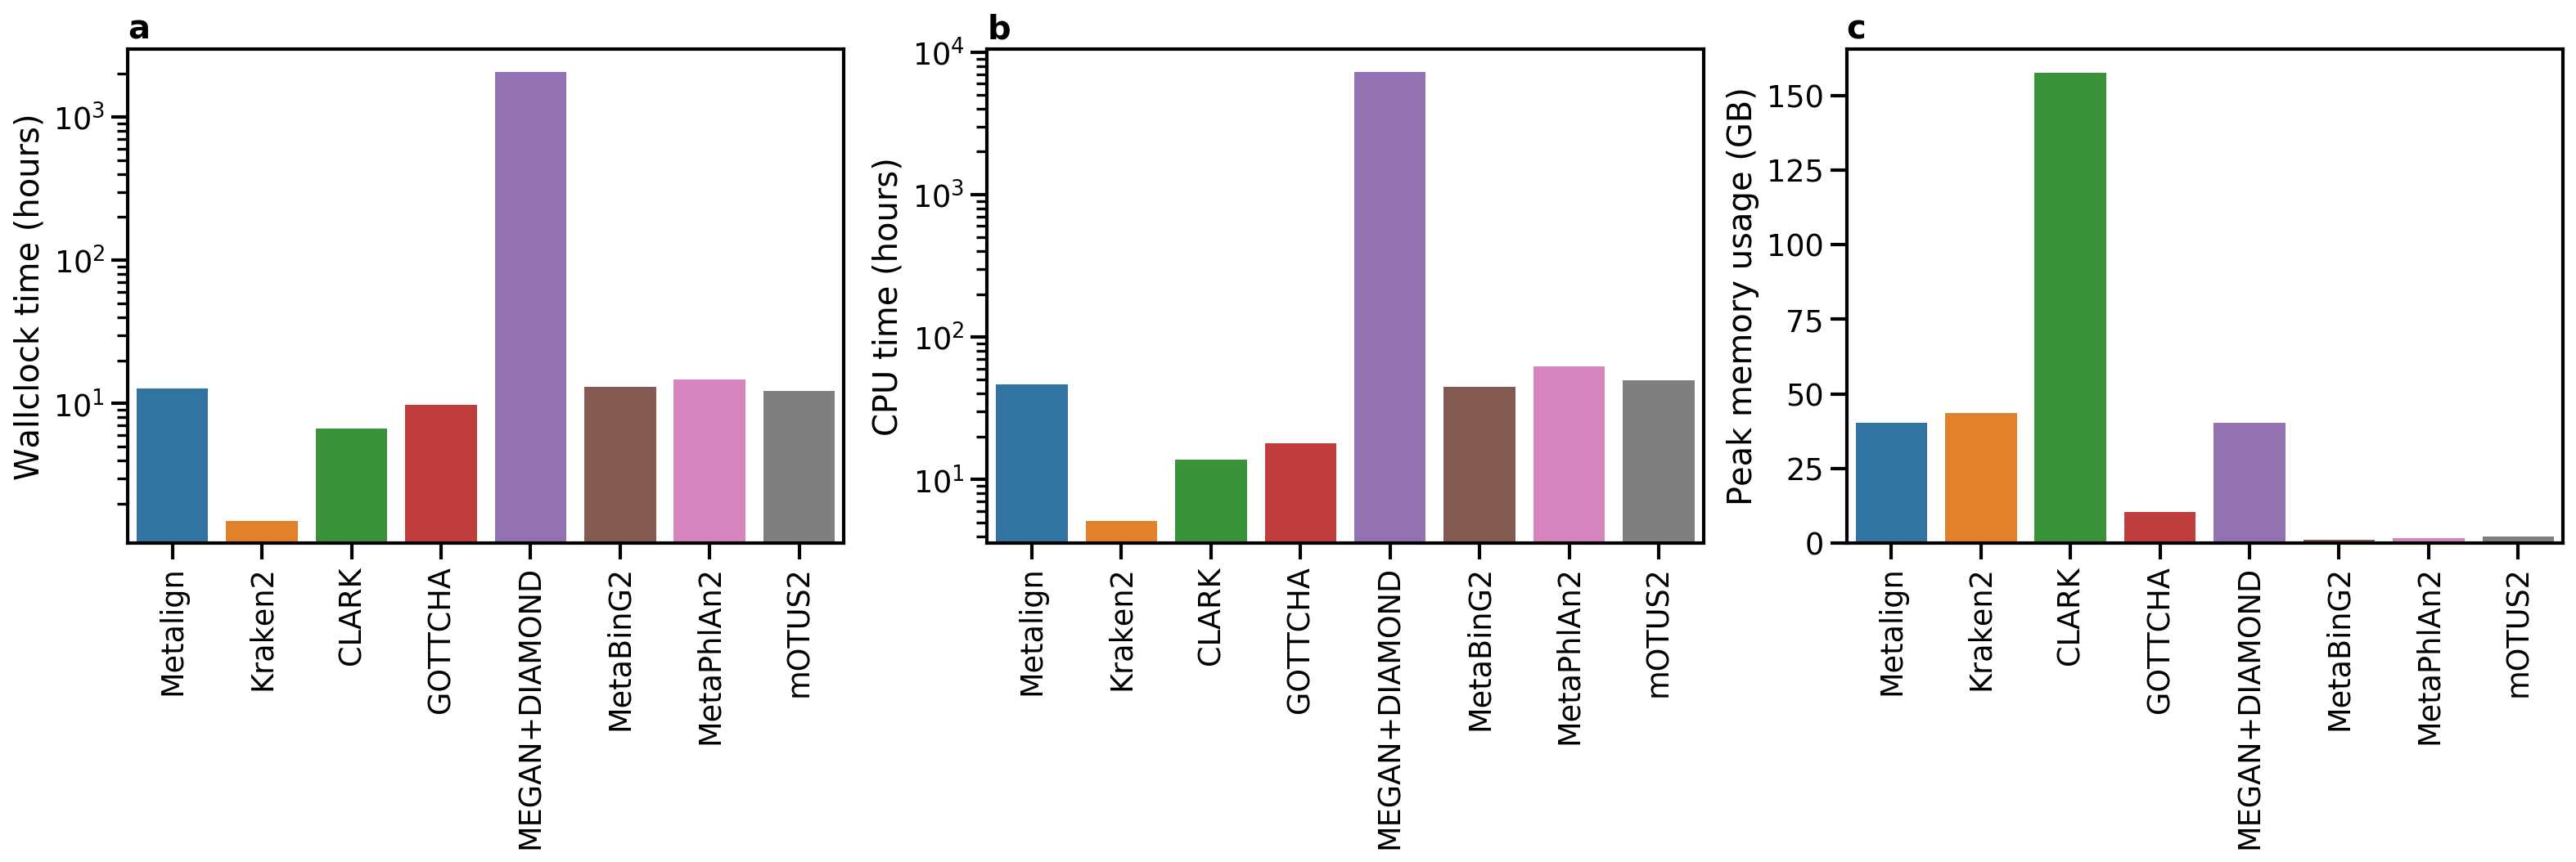

In [23]:
figure(num=None, figsize=(24, 5), dpi=160, facecolor='w', edgecolor='k')
methods = list(cami_timing_mem.index)

plt.subplot(1, 3, 1)
ax = sns.barplot(x=methods, y=cami_timing_mem['Wallclock time'].tolist())
plt.xticks(rotation=90)
plt.yscale('log')
plt.ylabel('Wallclock time (hours)')
ax.set_title('a', loc='left', fontweight='bold')

plt.subplot(1, 3, 2)
ax = sns.barplot(x=methods, y=cami_timing_mem['CPU time'].tolist())
plt.xticks(rotation=90)
plt.yscale('log')
plt.ylabel('CPU time (hours)')
ax.set_title('b', loc='left', fontweight='bold')

plt.subplot(1, 3, 3)
ax = sns.barplot(x=methods, y=cami_timing_mem['Max Memory Usage (GB)'].tolist())
plt.xticks(rotation=90)
plt.ylabel('Peak memory usage (GB)')
ax.set_title('c', loc='left', fontweight='bold')

plt.savefig("figures/CAMI1_timing_mem.png", bbox_inches='tight')

In [24]:
def prepare_cami1_metrics_df(df):
    df['1 - (L1 error / 2)'] = 1 - (df['L1 norm error'] / 2)
    df['1 - (UniFrac / 14)'] = 1 - (df['Weighted UniFrac error'] / 14)
    df = df.rename(columns={'Purity (precision)': 'Precision', 'Completeness (recall)': 'Recall'})
    return df

In [25]:
family_rank_df = pd.read_csv('plot_inputs/family_all_metrics.tsv', sep='\t', index_col=0, header=0)
family_rank_df = prepare_cami1_metrics_df(family_rank_df)
genus_rank_df = pd.read_csv('plot_inputs/genus_all_metrics.tsv', sep='\t', index_col=0, header=0)
genus_rank_df = prepare_cami1_metrics_df(genus_rank_df)
species_rank_df = pd.read_csv('plot_inputs/species_all_metrics.tsv', sep='\t', index_col=0, header=0)
species_rank_df = prepare_cami1_metrics_df(species_rank_df)
all_rank_df = pd.read_csv('plot_inputs/all_all_metrics.tsv', sep='\t', index_col=0, header=0)
all_rank_df = prepare_cami1_metrics_df(all_rank_df)
genus_rank_df

,Precision,Recall,F1 score,Jaccard index,L1 norm error,Weighted UniFrac error,Method,1 - (L1 error / 2),1 - (UniFrac / 14)
Metalign,0.728923,0.841692,0.779130,0.639597,0.536193,8.810562,Metalign,0.731904,0.370674
Bracken+Kraken2,0.075668,0.654875,0.133042,0.072216,1.099944,8.934372,Bracken+Kraken2,0.450028,0.361831
CLARK,0.062138,0.658107,0.111496,0.059687,1.106521,9.018481,CLARK,0.446739,0.355823
GOTTCHA,0.592715,0.234359,0.334510,0.200980,1.729660,11.528175,GOTTCHA,0.135170,0.176559
MEGAN+DIAMOND,0.877116,0.718107,0.787000,0.650344,0.545043,10.244024,MEGAN+DIAMOND,0.727478,0.268284
MetaBinG2,0.619462,0.050232,0.087516,0.046076,1.704202,11.742664,MetaBinG2,0.147899,0.161238
MetaPhlAn2,0.731731,0.330964,0.453344,0.293841,1.453663,10.147136,MetaPhlAn2,0.273169,0.275205
mOTUs2,0.815763,0.808093,0.811296,0.685254,0.469355,8.184031,mOTUs2,0.765323,0.415426


In [26]:
def plot_panel_figure_cami1(family_df, genus_df, species_df, identifier, heatmap_textsize=16):
    figure(num=None, figsize=(16, 24), dpi=160, facecolor='w', edgecolor='k')
    plt.subplots_adjust(hspace = 0.55)
    methods = list(genus_df.index)
    drop_list = ['Method', 'Weighted UniFrac error', 'L1 norm error', 'Jaccard index']

    # Family level heatmap
    plt.subplot(3, 2, 1)
    ax = sns.heatmap(family_df.drop(labels=drop_list, axis=1), annot=True, annot_kws={"size": heatmap_textsize}, cbar=False)
    plt.xticks(rotation=90)
    ax.set_ylim(float(len(methods)), 0)
    ax.set_title('a) Family level', loc='left', fontweight='bold')
    
    # Family level precision/recall scatterplot
    ax=plt.subplot(3, 2, 2)
    markers = ['*', 's', 'p', 'x', '^', '+', 'o', '<', 'D', 'h', '1', '2']
    for i in range(len(methods)):
        plt.scatter(family_df['Precision'][methods[i]], family_df['Recall'][methods[i]], 
                    marker=markers[i], label=methods[i]) 
    box = ax.get_position()
    ax.set_position([box.x0, box.y0, box.width * 1.0, box.height * 1.0])
    ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.13), ncol=2)
    ax.set(xlabel="Precision", ylabel="Recall")
    
    # Genus level heatmap
    plt.subplot(3, 2, 3)
    ax = sns.heatmap(genus_df.drop(labels=drop_list, axis=1), annot=True, annot_kws={"size": heatmap_textsize}, cbar=False)
    plt.xticks(rotation=90)
    ax.set_ylim(float(len(methods)), 0)
    ax.set_title('b) Genus level', loc='left', fontweight='bold')
    
    # Genus level precision/recall scatterplot
    ax=plt.subplot(3, 2, 4)
    markers = ['*', 's', 'p', 'x', '^', '+', 'o', '<', 'D', 'h', '1', '2']
    for i in range(len(methods)):
        plt.scatter(genus_df['Precision'][methods[i]], genus_df['Recall'][methods[i]], 
                    marker=markers[i], label=methods[i]) 
    box = ax.get_position()
    ax.set_position([box.x0, box.y0, box.width * 1.0, box.height * 1.0])
    ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.13), ncol=2)
    ax.set(xlabel="Precision", ylabel="Recall")
    
    # Species level heatmap
    plt.subplot(3, 2, 5)
    ax = sns.heatmap(species_df.drop(labels=drop_list, axis=1), annot=True, annot_kws={"size": heatmap_textsize}, cbar=False)
    plt.xticks(rotation=90)
    ax.set_ylim(float(len(methods)), 0)
    ax.set_title('c) Species level', loc='left', fontweight='bold')
    
    # Species level precision/recall scatterplot
    ax=plt.subplot(3, 2, 6)
    markers = ['*', 's', 'p', 'x', '^', '+', 'o', '<', 'D', 'h', '1', '2']
    for i in range(len(methods)):
        plt.scatter(species_df['Precision'][methods[i]], species_df['Recall'][methods[i]], 
                    marker=markers[i], label=methods[i]) 
    box = ax.get_position()
    ax.set_position([box.x0, box.y0, box.width * 1.0, box.height * 1.0])
    ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.13), ncol=2)
    ax.set(xlabel="Precision", ylabel="Recall")
    
    plt.savefig("figures/CAMI1_performance_" + identifier + ".png", bbox_inches='tight')

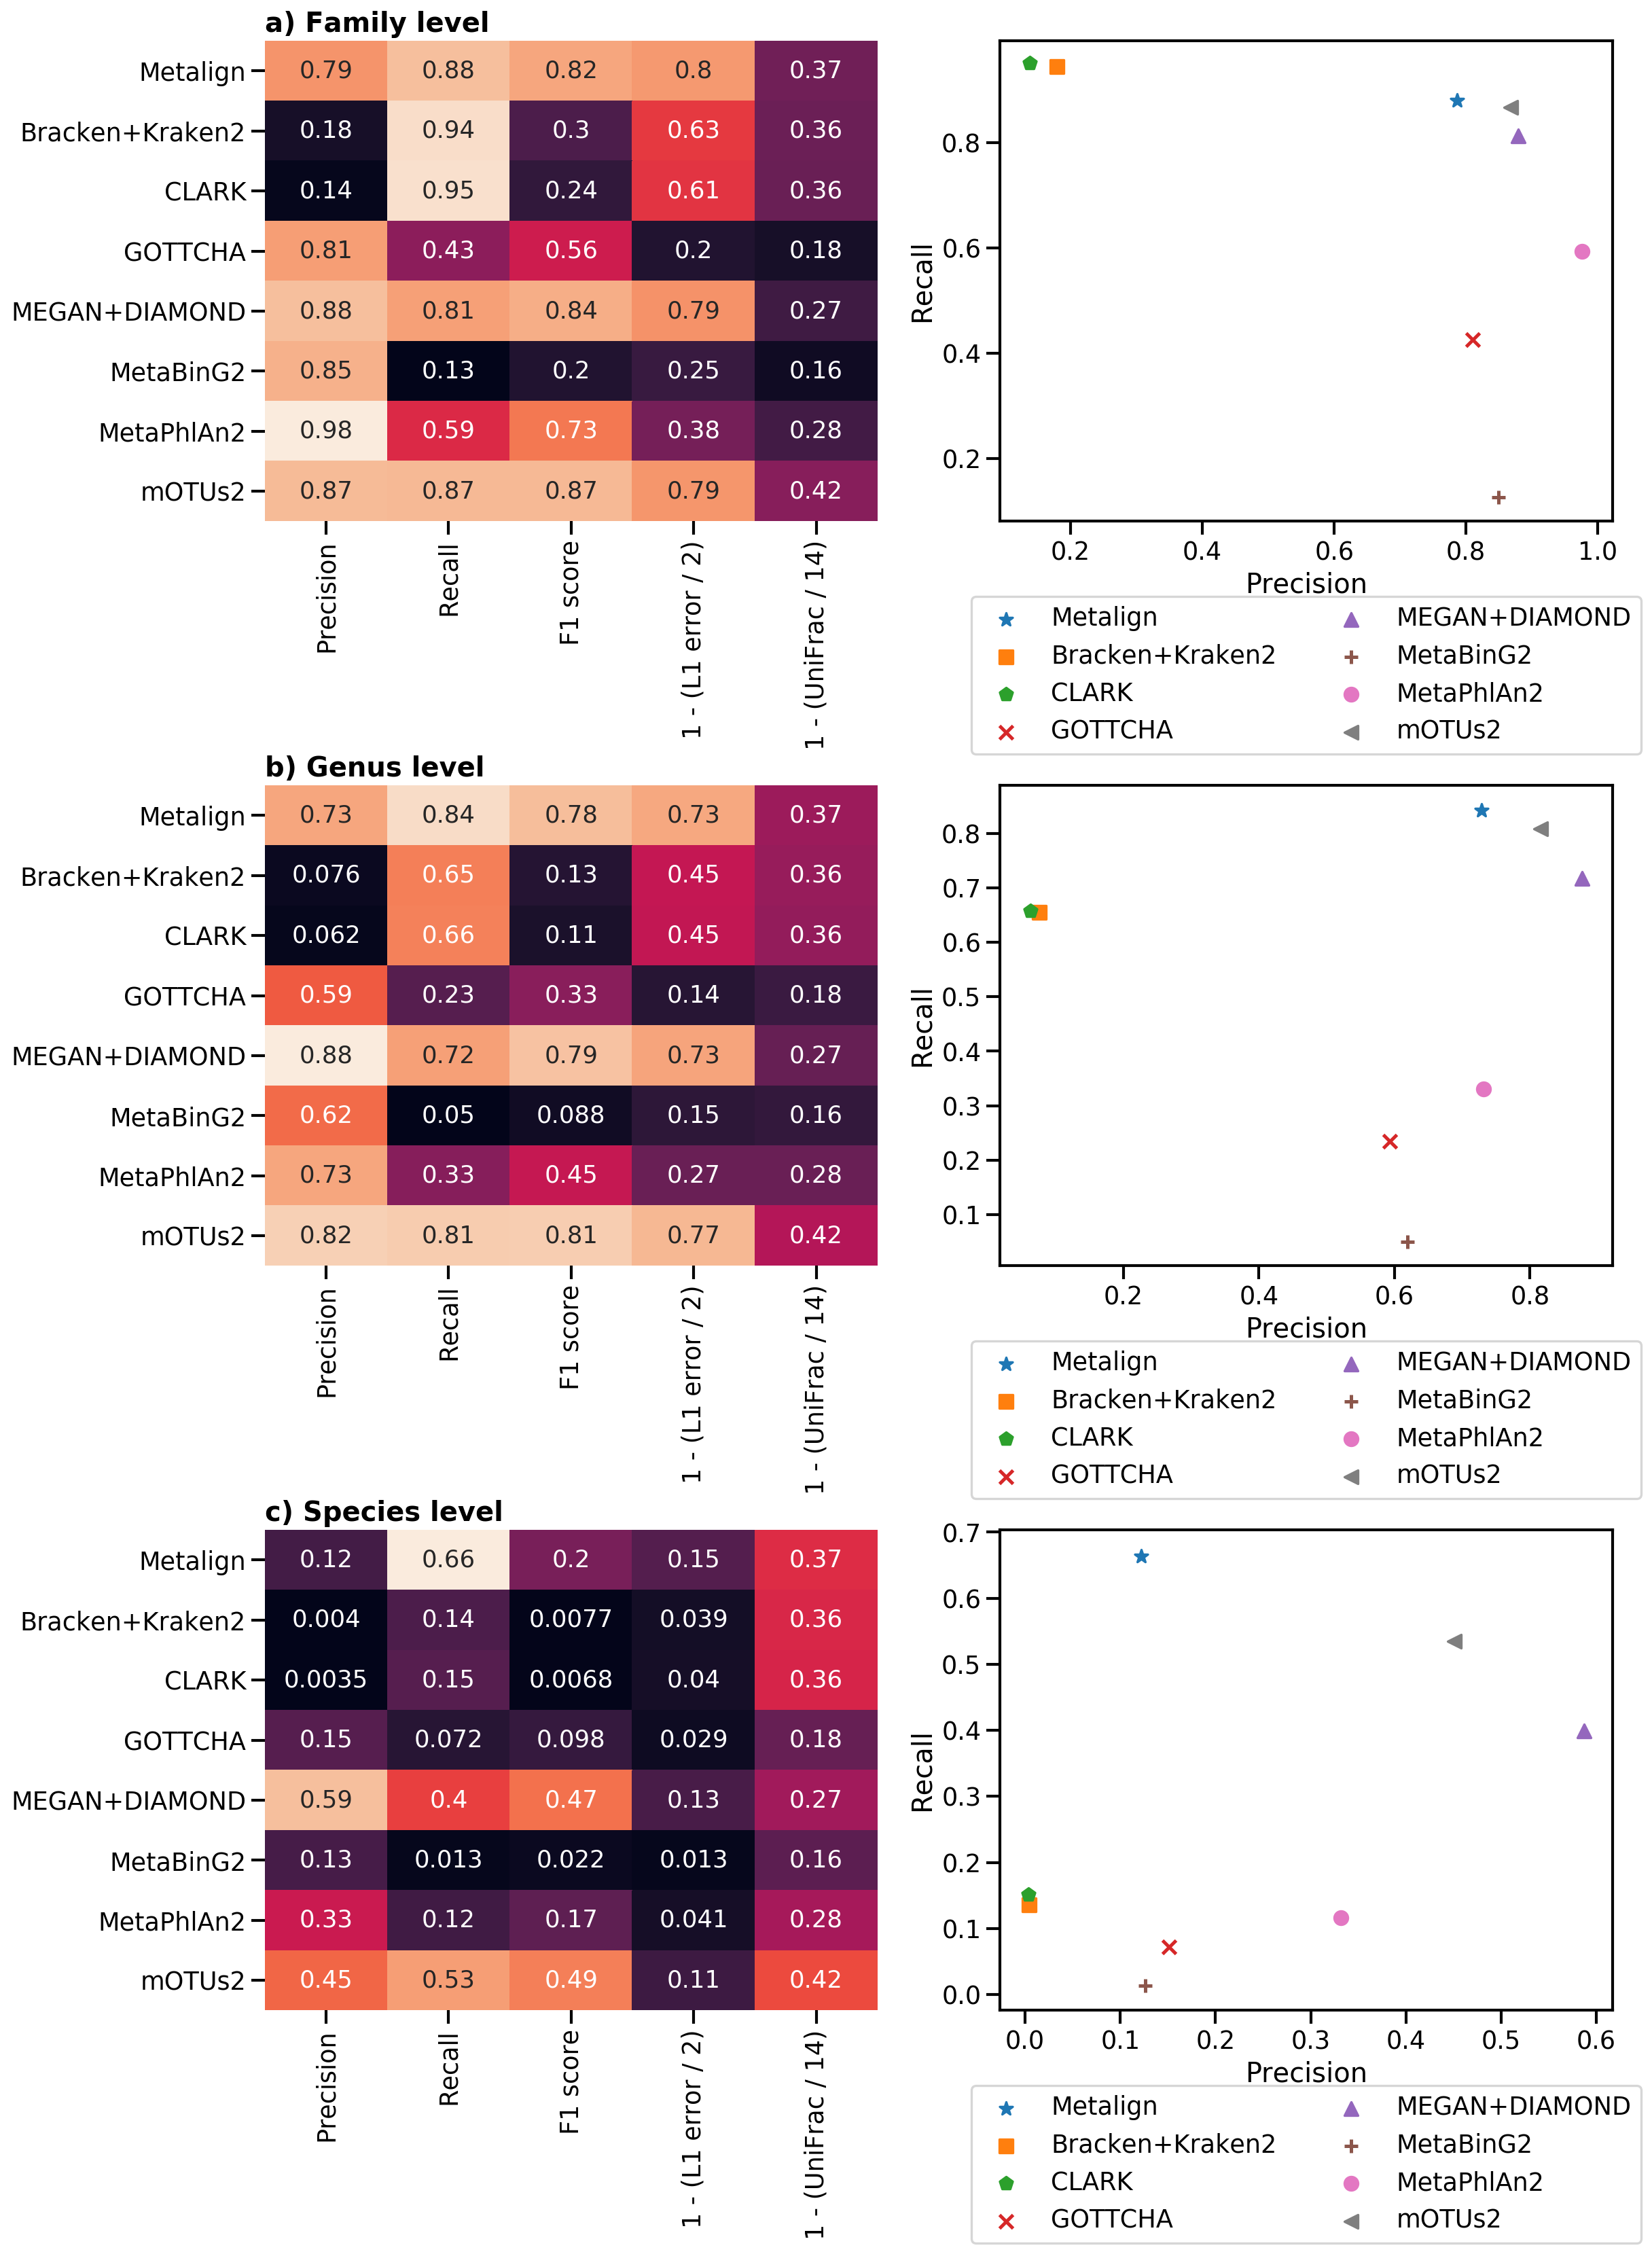

In [27]:
#plot_panel_figure_cami1(genus_rank_df, per_dataset_genus_f1, per_dataset_genus_l1, 'genus')
plot_panel_figure_cami1(family_rank_df, genus_rank_df, species_rank_df, "no_cutoff")

In [28]:
family_rank_df_thresh_0pt01pct = pd.read_csv('plot_inputs/family_all_metrics_thresh_0pt01pct.tsv', sep='\t', index_col=0, header=0)
family_rank_df_thresh_0pt01pct = prepare_cami1_metrics_df(family_rank_df_thresh_0pt01pct)
genus_rank_df_thresh_0pt01pct = pd.read_csv('plot_inputs/genus_all_metrics_thresh_0pt01pct.tsv', sep='\t', index_col=0, header=0)
genus_rank_df_thresh_0pt01pct = prepare_cami1_metrics_df(genus_rank_df_thresh_0pt01pct)
species_rank_df_thresh_0pt01pct = pd.read_csv('plot_inputs/species_all_metrics_thresh_0pt01pct.tsv', sep='\t', index_col=0, header=0)
species_rank_df_thresh_0pt01pct = prepare_cami1_metrics_df(species_rank_df_thresh_0pt01pct)
all_rank_df_thresh_0pt01pct = pd.read_csv('plot_inputs/all_all_metrics_thresh_0pt01pct.tsv', sep='\t', index_col=0, header=0)
all_rank_df_thresh_0pt01pct = prepare_cami1_metrics_df(all_rank_df_thresh_0pt01pct)
genus_rank_df_thresh_0pt01pct

,Precision,Recall,F1 score,Jaccard index,L1 norm error,Weighted UniFrac error,Method,1 - (L1 error / 2),1 - (UniFrac / 14)
Metalign,0.816694,0.836882,0.825019,0.704041,0.535896,8.810483,Metalign,0.732052,0.370680
Bracken+Kraken2,0.187205,0.607285,0.275934,0.163817,1.090120,8.959082,Bracken+Kraken2,0.454940,0.360066
CLARK,0.377921,0.527235,0.419052,0.269484,1.089260,9.015410,CLARK,0.455370,0.356042
GOTTCHA,0.592715,0.234359,0.334510,0.200980,1.729660,11.528175,GOTTCHA,0.135170,0.176559
MEGAN+DIAMOND,0.877116,0.718107,0.787000,0.650344,0.545043,10.243574,MEGAN+DIAMOND,0.727478,0.268316
MetaBinG2,0.619462,0.050232,0.087516,0.046076,1.704202,11.742664,MetaBinG2,0.147899,0.161238
MetaPhlAn2,0.746331,0.290934,0.416625,0.263714,1.454261,10.148381,MetaPhlAn2,0.272870,0.275116
mOTUs2,0.841644,0.791259,0.815483,0.691134,0.469404,8.184696,mOTUs2,0.765298,0.415379


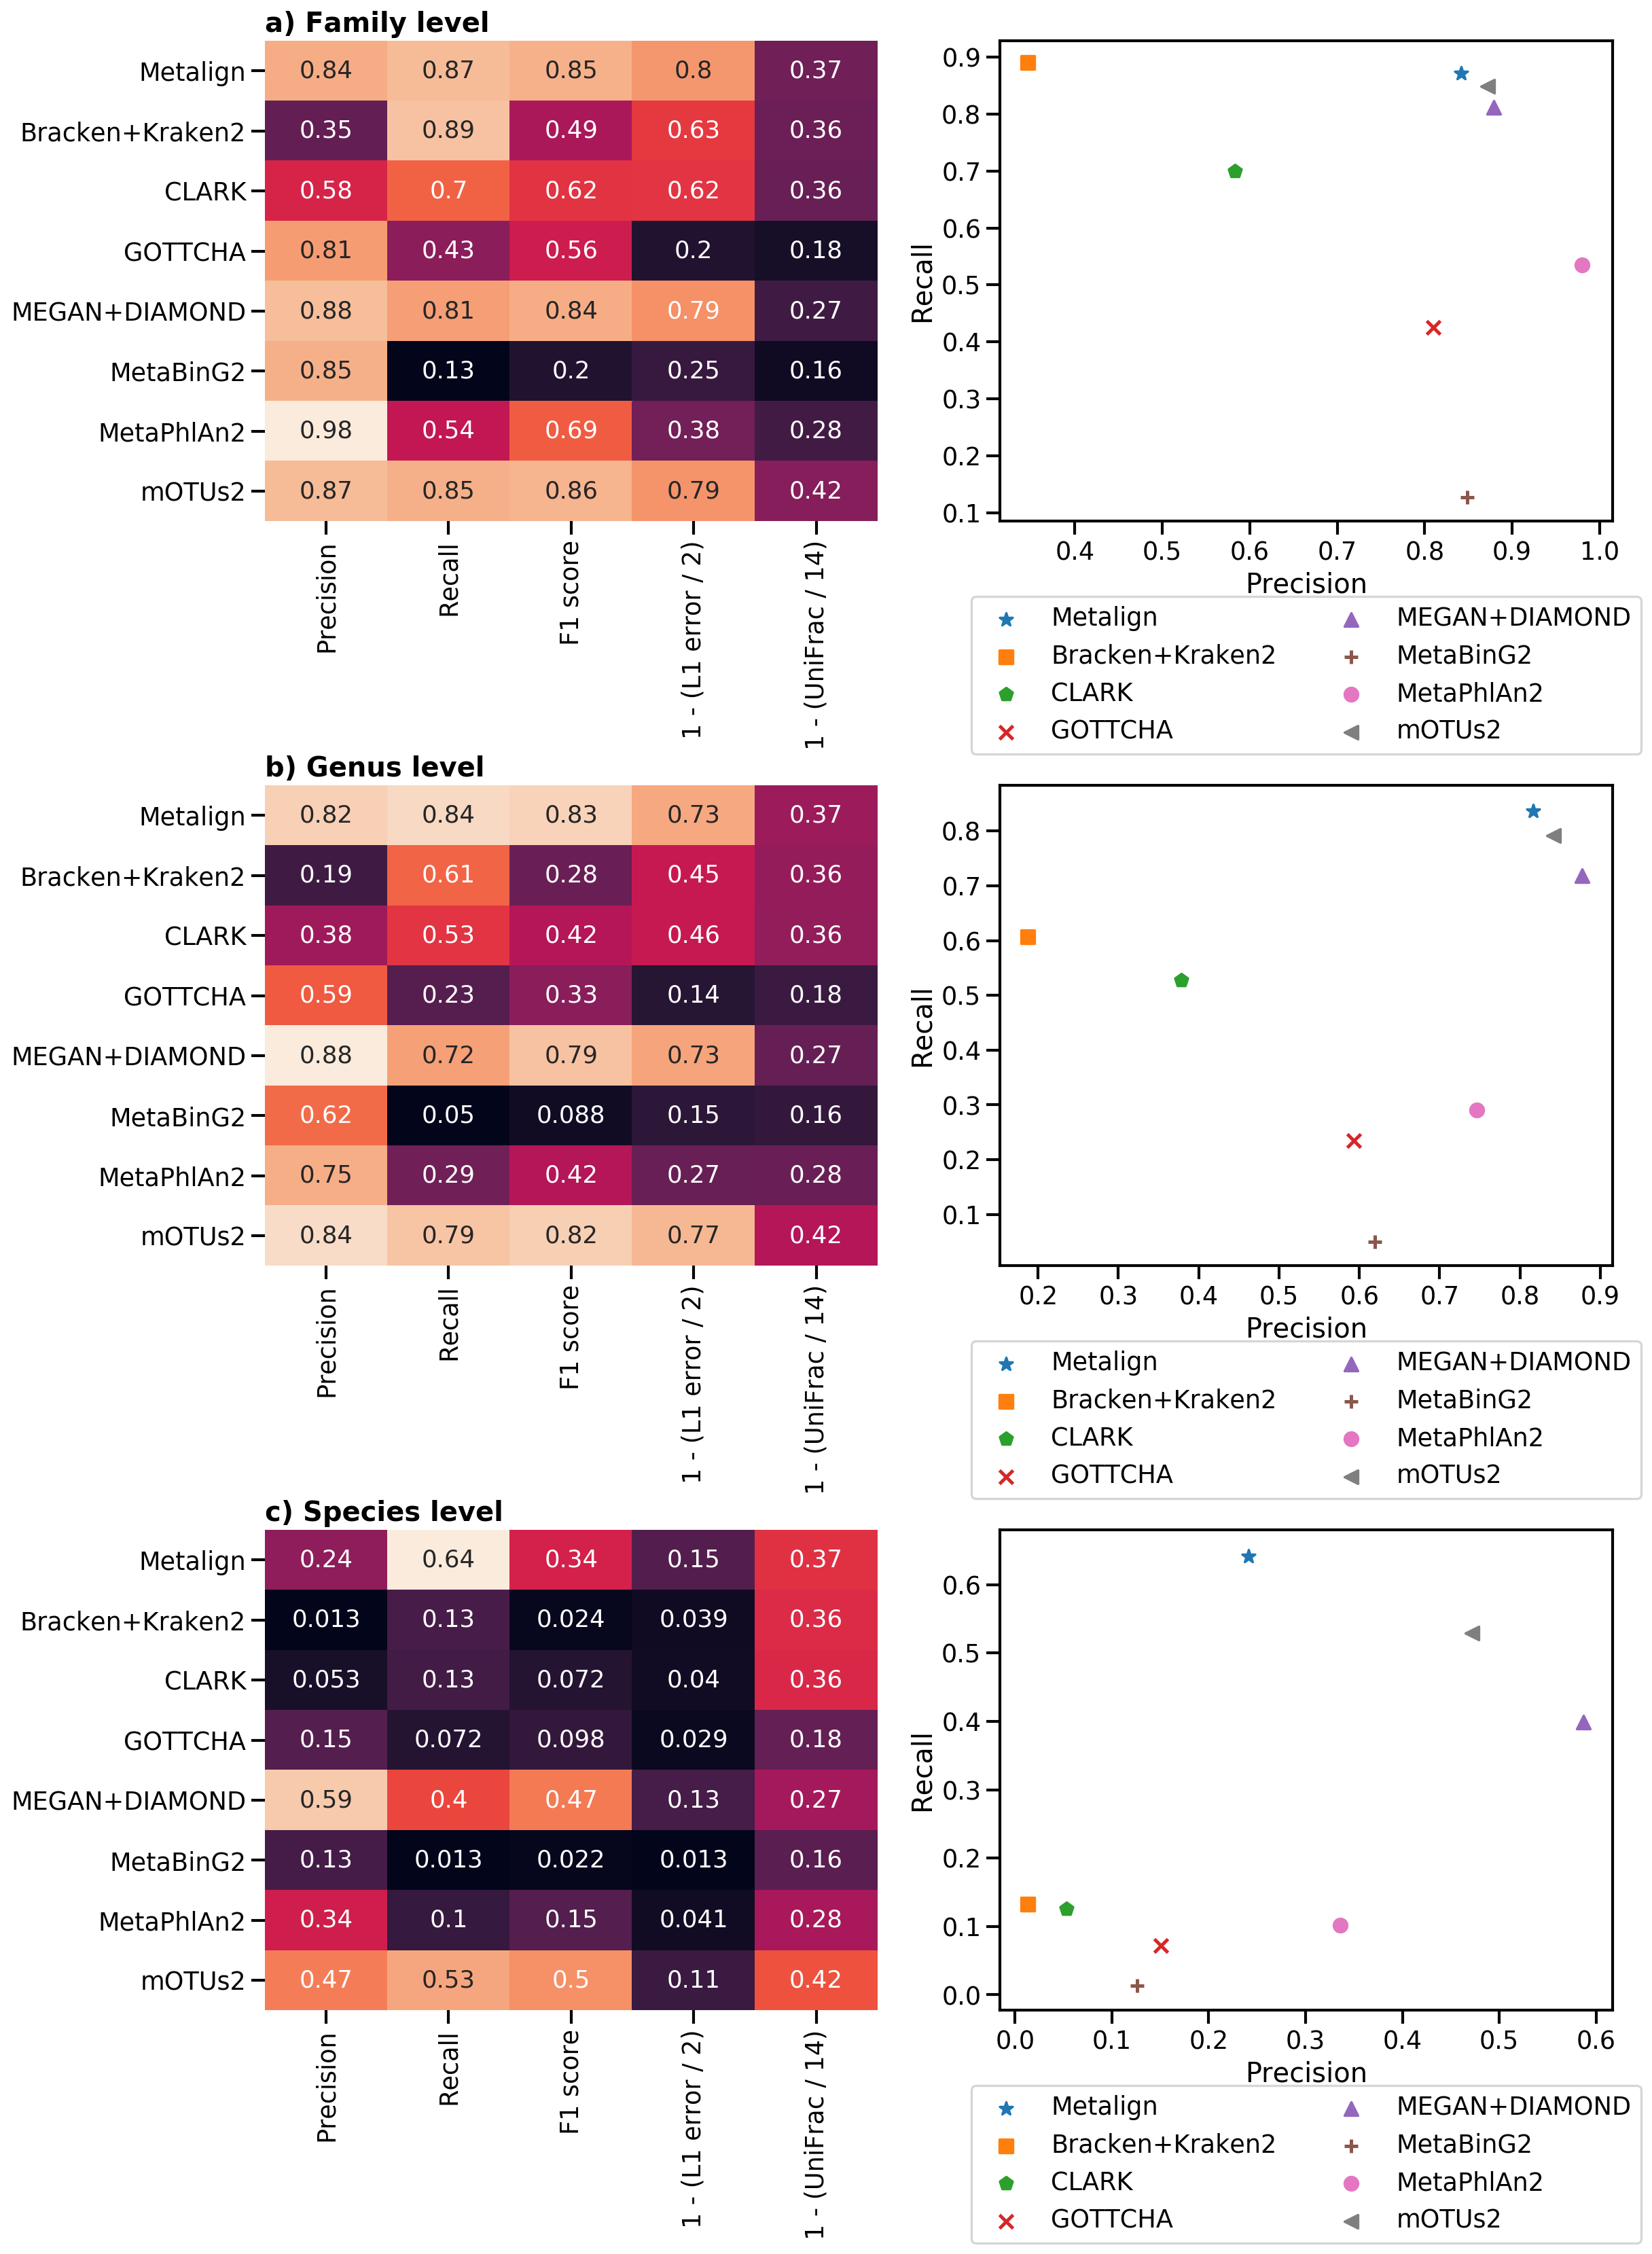

In [29]:
#plot_panel_figure_cami1(genus_rank_df_thresh_0pt01pct, per_dataset_genus_f1_thresh_0pt01pct, per_dataset_genus_l1_thresh_0pt01pct, 'genus_thresh_0pt01pct')
plot_panel_figure_cami1(family_rank_df_thresh_0pt01pct, genus_rank_df_thresh_0pt01pct, species_rank_df_thresh_0pt01pct, "no_cutoff_thresh_0pt01pct")


In [30]:
def prepare_mock_df(df):
    df.columns = ['0.01%', '0.1%', '10%', '1%',' 5%', 'None']  # rename cols to cutoff percentages
    cols = df.columns.tolist()
    cols = cols[-1:] + cols[:-1]  # move no cutoff to first column
    cols = cols[:3] + cols[4:] + [cols[3]]  # move 10% cutoff to end
    cols = [cols[0], cols[2], cols[3], cols[4]]  # keep None, 0.1%, 1%, 5%, which are most informative
    df = df[cols]
    return df.T

In [31]:
peabody_f1s_family = pd.read_csv('plot_inputs/peabody_family_f1_per_cutoff.tsv', sep='\t', index_col=0, header=None)
peabody_f1s_family = prepare_mock_df(peabody_f1s_family)
peabody_f1s_genus = pd.read_csv('plot_inputs/peabody_genus_f1_per_cutoff.tsv', sep='\t', index_col=0, header=None)
peabody_f1s_genus = prepare_mock_df(peabody_f1s_genus)
peabody_f1s_all = pd.read_csv('plot_inputs/peabody_all_f1_per_cutoff.tsv', sep='\t', index_col=0, header=None)
peabody_f1s_all = prepare_mock_df(peabody_f1s_all)
peabody_f1s_species = pd.read_csv('plot_inputs/peabody_species_f1_per_cutoff.tsv', sep='\t', index_col=0, header=None)
peabody_f1s_species = prepare_mock_df(peabody_f1s_species)
peabody_f1s_genus

,Metalign,Bracken+Kraken2,CLARK,GOTTCHA,MEGAN+DIAMOND,MetaBinG2,MetaPhlAn2,mOTUs2
None,0.761905,0.046512,0.043956,0.875000,0.727273,0.800000,0.8,0.615385
0.1%,0.888889,0.666667,0.800000,0.875000,0.761905,0.800000,0.8,0.615385
1%,1.000000,0.888889,0.823529,0.875000,0.941176,0.800000,0.8,0.615385
5%,1.000000,1.000000,0.769231,0.615385,0.857143,0.857143,0.8,0.666667


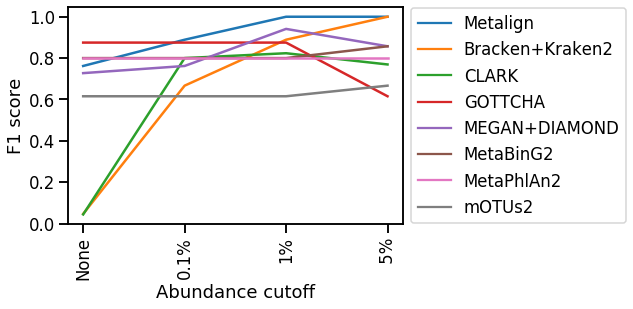

In [32]:
plt.figure()
ax = sns.lineplot(data=peabody_f1s_genus, linewidth=2.5, sort=False, dashes=False)
plt.xticks(rotation=90)
ax.set(xlabel="Abundance cutoff", ylabel="F1 score")
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.savefig("figures/mock_f1_vs_cutoff.png", bbox_inches='tight')

In [35]:
real_wallclock_timing = pd.read_csv('plot_inputs/real_data_wallclock_time.txt', sep='\t', index_col=0).T
real_wallclock_timing

,Metalign,Kraken2,CLARK,GOTTCHA,MEGAN+DIAMOND,MetaBinG2,MetaPhlAn2,mOTUs2
0.1,0.470500,0.064242,0.166822,0.047853,5.188119,0.010092,0.030406,0.013961
11,0.378681,0.051597,0.191058,0.908003,47.364222,0.633333,0.666231,0.364767
98,2.707389,0.409136,1.226547,7.068131,NaN,5.826608,5.359267,3.821142


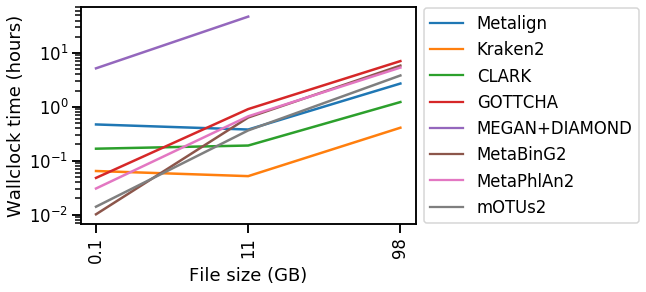

In [36]:
plt.figure()
ax = sns.lineplot(data=real_wallclock_timing, linewidth=2.5, sort=False, dashes=False)
plt.xticks(rotation=90)
ax.set(xlabel="File size (GB)", ylabel="Wallclock time (hours)")
plt.yscale('log')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.savefig("figures/real_data_wallclock_scaling.png", bbox_inches='tight')